# Project Statistical Analysis

# Environment

In [44]:
###### DATAFRAME ###### 
import pandas as pd
import numpy as np

###### STATISTICS ###### 
import scipy.stats as stats
from scipy.stats import t
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

###### VISUALIZATION ###### 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### SETTINGS ###### 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)

**Import datasets created on the cleaning data notebook.**

Clean dataset of Big Mac index and country indicators

In [2]:
data = pd.read_csv("data/clean_data.csv",index_col=0)
data.head()

date iso_a3 currency_code       name  local_price  dollar_ex  dollar_price  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  AG.LND.CROP.ZS  AG.LND.TOTL.K2  AG.PRD.CROP.XD  AG.PRD.FOOD.XD  AG.PRD.LVSK.XD  AG.SRF.TOTL.K2  BM.KLT.DINV.CD.WD  BM.KLT.DINV.WD.GD.ZS  BX.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  EG.ELC.ACCS.ZS  EN.POP.DNST  EN.URB.LCTY  EN.URB.LCTY.UR.ZS  EP.PMP.SGAS.CD  ER.FSH.AQUA.MT  ER.FSH.CAPT.MT  ER.FSH.PROD.MT  ER.LND.PTLD.ZS  ER.PTD.TOTL.ZS  FI.RES.TOTL.CD  FI.RES.XGLD.CD  IC.BUS.DFRN.XQ  IC.BUS.DISC.XQ  IC.CRD.INFO.XQ  IC.CRD.PRVT.ZS  IC.CRD.PUBL.ZS  IC.ELC.TIME  IC.EXP.CSBC.CD  IC.EXP.CSDC.CD  IC.EXP.TMBC  IC.EXP.TMDC  IC.IMP.CSBC.CD  IC.IMP.CSDC.CD  IC.IMP.TMBC  IC.IMP.TMDC  IC.LGL.CRED.XQ  IC.LGL.DURS  IC.PRP.DURS  IC.PRP.PROC  IC.REG.COST.PC.FE.ZS  IC.REG.COST.PC.MA.ZS  IC.REG.COST.PC.ZS  IC.REG.DURS  IC.REG.DURS.FE  IC.REG.DURS.MA  IC.REG.PROC  IC.REG.PROC.FE  IC.REG.PROC.MA  \
0  2016-01-01    ARE           AED        UAE        13.00   3.673100      3.539245    3.888000e+03        5.474514         44500.0           0.004754        0.626584        0.553365         71020.0           82.98          102.28          149.90         83600.0       1.296392e+10              3.630893       9.604773e+09              2.690073         100.000000         100.000000      100.000000   131.807660    2522885.0          31.351224            0.49        1240.900         73000.0         74240.9           13.07        9.235668    8.539083e+10    8.511764e+10           76.86            10.0             7.0            53.8             8.9         28.0           462.0           178.0         27.0          6.0           678.0           283.0         54.0         12.0             2.0        445.0          1.5          2.0                  13.0                  13.0               13.0          8.2             9.0             8.0          4.0             5.0             4.0   
1  2016-01-01    ARG           ARS  Argentina        33.00  13.809250      2.389703    1.487000e+06       54.335712      39200000.0           0.899281       14.323873        0.365405       2736690.0          145.49          129.11          107.00       2780400.0       1.786531e+09              0.320436       3.260164e+09              0.584750          99.732692          99.988281       99.966881    15.928135   14792181.0          37.035500            1.10        3673.485        755226.0        758899.5            8.89        7.528593    3.841451e+10    3.632330e+10           58.04             7.0             8.0           100.0            41.6         92.0           150.0            60.0         21.0         30.0          1200.0           120.0         60.0        192.0             3.0        995.0         51.5          7.0                  10.8                  10.8               10.8         24.5            24.5            24.5         14.0            14.0            14.0   
2  2016-01-01    AUS           AUD  Australia         5.30   1.415729      3.743655    3.710780e+06       48.241944      46048000.0           1.903525        5.986464        0.042902       7692020.0          107.12          105.58          102.02       7741220.0      -5.933455e+09             -0.490357       3.922571e+10              3.241718         100.000000         100.000000      100.000000     3.144936    4625496.0          22.285320            0.93       96847.640        174629.4        271477.0           16.98       28.591842    5.355579e+10    5.087209e+10           80.14             8.0             7.0           100.0             0.0         75.0           749.0           264.0         36.0          7.0           525.0           100.0         39.0          4.0            11.0        402.0          4.5          5.0                   0.7                   0.7                0.7          2.5             2.5             2.5          3.0             3.0             3.0   
3  2016-01-01    BRA           BRL     Br

Clean dataser of the meaning of each indicator

In [3]:
data_indicators = pd.read_csv("data/clean_data_indicators.csv",index_col=0)
data_indicators.head()

Indicator Code                      Indicator Name
0     AG.LND.AGRI.K2          Agricultural land (sq. km)
1     AG.LND.AGRI.ZS  Agricultural land (% of land area)
2     AG.LND.ARBL.HA              Arable land (hectares)
3  AG.LND.ARBL.HA.PC   Arable land (hectares per person)
4     AG.LND.ARBL.ZS        Arable land (% of land area)

## Statistical analysis

In [4]:
df = data.copy() #cortafuegos con los datos limpios

In [5]:
df.head()

date iso_a3 currency_code       name  local_price  dollar_ex  dollar_price  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  AG.LND.CROP.ZS  AG.LND.TOTL.K2  AG.PRD.CROP.XD  AG.PRD.FOOD.XD  AG.PRD.LVSK.XD  AG.SRF.TOTL.K2  BM.KLT.DINV.CD.WD  BM.KLT.DINV.WD.GD.ZS  BX.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  EG.ELC.ACCS.ZS  EN.POP.DNST  EN.URB.LCTY  EN.URB.LCTY.UR.ZS  EP.PMP.SGAS.CD  ER.FSH.AQUA.MT  ER.FSH.CAPT.MT  ER.FSH.PROD.MT  ER.LND.PTLD.ZS  ER.PTD.TOTL.ZS  FI.RES.TOTL.CD  FI.RES.XGLD.CD  IC.BUS.DFRN.XQ  IC.BUS.DISC.XQ  IC.CRD.INFO.XQ  IC.CRD.PRVT.ZS  IC.CRD.PUBL.ZS  IC.ELC.TIME  IC.EXP.CSBC.CD  IC.EXP.CSDC.CD  IC.EXP.TMBC  IC.EXP.TMDC  IC.IMP.CSBC.CD  IC.IMP.CSDC.CD  IC.IMP.TMBC  IC.IMP.TMDC  IC.LGL.CRED.XQ  IC.LGL.DURS  IC.PRP.DURS  IC.PRP.PROC  IC.REG.COST.PC.FE.ZS  IC.REG.COST.PC.MA.ZS  IC.REG.COST.PC.ZS  IC.REG.DURS  IC.REG.DURS.FE  IC.REG.DURS.MA  IC.REG.PROC  IC.REG.PROC.FE  IC.REG.PROC.MA  \
0  2016-01-01    ARE           AED        UAE        13.00   3.673100      3.539245    3.888000e+03        5.474514         44500.0           0.004754        0.626584        0.553365         71020.0           82.98          102.28          149.90         83600.0       1.296392e+10              3.630893       9.604773e+09              2.690073         100.000000         100.000000      100.000000   131.807660    2522885.0          31.351224            0.49        1240.900         73000.0         74240.9           13.07        9.235668    8.539083e+10    8.511764e+10           76.86            10.0             7.0            53.8             8.9         28.0           462.0           178.0         27.0          6.0           678.0           283.0         54.0         12.0             2.0        445.0          1.5          2.0                  13.0                  13.0               13.0          8.2             9.0             8.0          4.0             5.0             4.0   
1  2016-01-01    ARG           ARS  Argentina        33.00  13.809250      2.389703    1.487000e+06       54.335712      39200000.0           0.899281       14.323873        0.365405       2736690.0          145.49          129.11          107.00       2780400.0       1.786531e+09              0.320436       3.260164e+09              0.584750          99.732692          99.988281       99.966881    15.928135   14792181.0          37.035500            1.10        3673.485        755226.0        758899.5            8.89        7.528593    3.841451e+10    3.632330e+10           58.04             7.0             8.0           100.0            41.6         92.0           150.0            60.0         21.0         30.0          1200.0           120.0         60.0        192.0             3.0        995.0         51.5          7.0                  10.8                  10.8               10.8         24.5            24.5            24.5         14.0            14.0            14.0   
2  2016-01-01    AUS           AUD  Australia         5.30   1.415729      3.743655    3.710780e+06       48.241944      46048000.0           1.903525        5.986464        0.042902       7692020.0          107.12          105.58          102.02       7741220.0      -5.933455e+09             -0.490357       3.922571e+10              3.241718         100.000000         100.000000      100.000000     3.144936    4625496.0          22.285320            0.93       96847.640        174629.4        271477.0           16.98       28.591842    5.355579e+10    5.087209e+10           80.14             8.0             7.0           100.0             0.0         75.0           749.0           264.0         36.0          7.0           525.0           100.0         39.0          4.0            11.0        402.0          4.5          5.0                   0.7                   0.7                0.7          2.5             2.5             2.5          3.0             3.0             3.0   
3  2016-01-01    BRA           BRL     Br

### Visualization of the Big Mac Index data

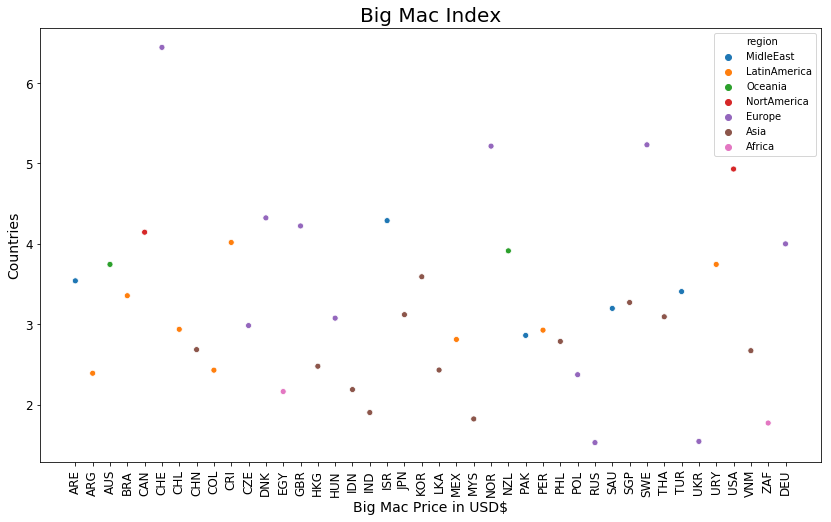

In [6]:
#Scatter plot of the Big Mac index per country
plt.figure(figsize = (14,8))
sns.scatterplot(x=df['iso_a3'], y=df['dollar_price'], hue=df['region'])
plt.xlabel('Big Mac Price in USD$', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Countries', fontsize=14)
plt.title('Big Mac Index', fontsize=20)
plt.show()

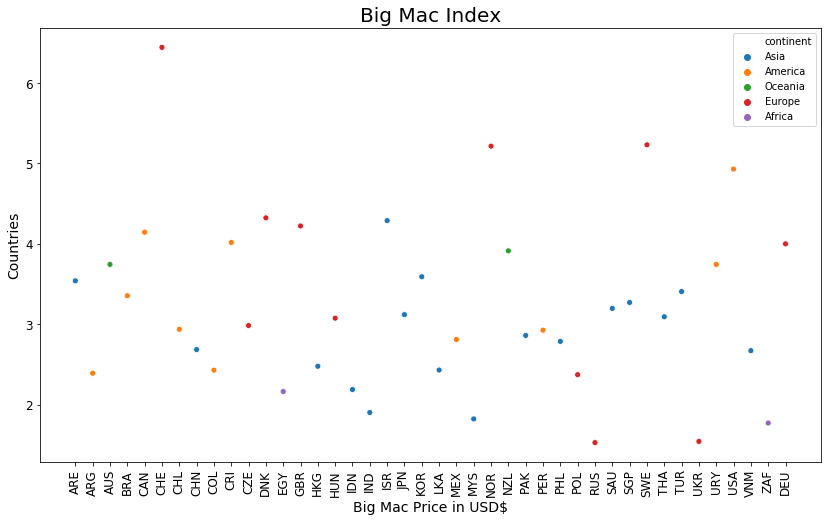

In [7]:
#Scatter plot of the Big Mac index per country
plt.figure(figsize = (14,8))
sns.scatterplot(x=df['iso_a3'], y=df['dollar_price'], hue=df['continent'])
plt.xlabel('Big Mac Price in USD$', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Countries', fontsize=14)
plt.title('Big Mac Index', fontsize=20)
plt.show()

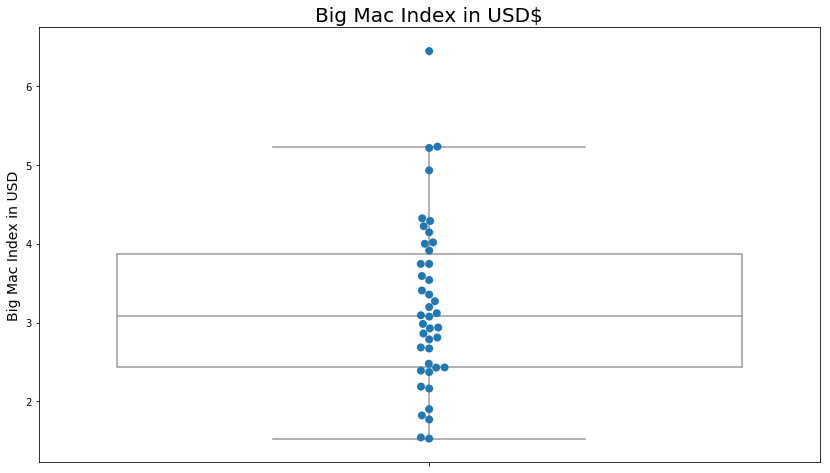

In [8]:
#Box plot of the Big Mac index 
plt.figure(figsize = (14,8))
sns.boxplot(y='dollar_price', data=df, color='white')
sns.swarmplot(y='dollar_price', data=df, size=8)
plt.ylabel('Big Mac Index in USD', fontsize=14)
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()

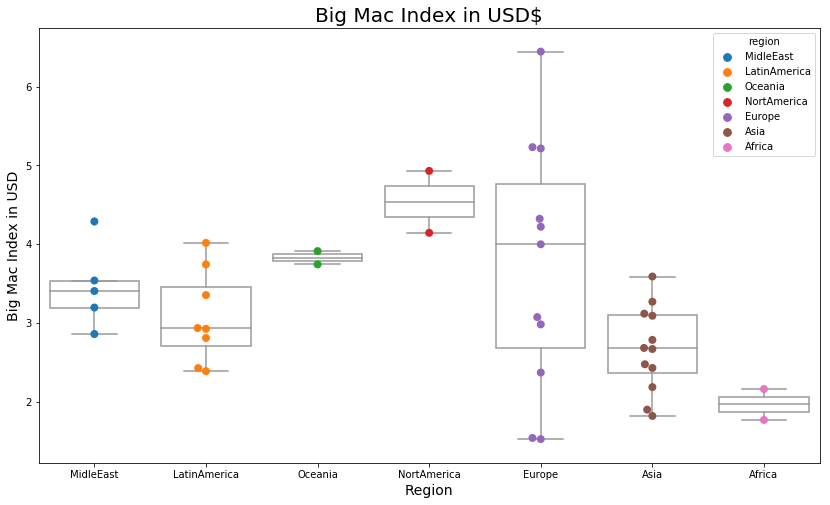

In [9]:
#Box plot of the Big Mac index per region
plt.figure(figsize = (14,8))
sns.boxplot(y='dollar_price', x = 'region', data=df, color='white')
sns.swarmplot(y='dollar_price',x = 'region', data=df, hue='region', size=8)
plt.ylabel('Big Mac Index in USD', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()


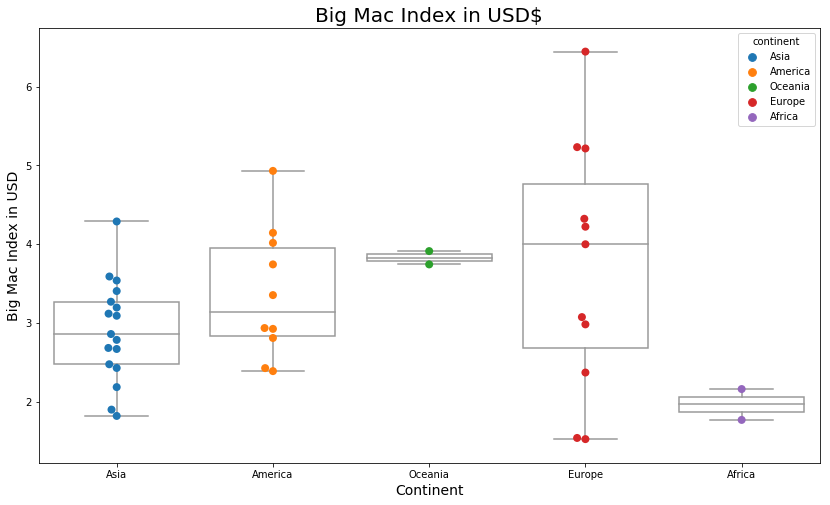

In [10]:
#Box plot of the Big Mac index per continent
plt.figure(figsize = (14,8))
sns.boxplot(y='dollar_price', x = 'continent', data=df, color='white')
sns.swarmplot(y='dollar_price',x = 'continent', data=df, hue='continent', size=8)
plt.ylabel('Big Mac Index in USD', fontsize=14)
plt.xlabel('Continent', fontsize=14)
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()

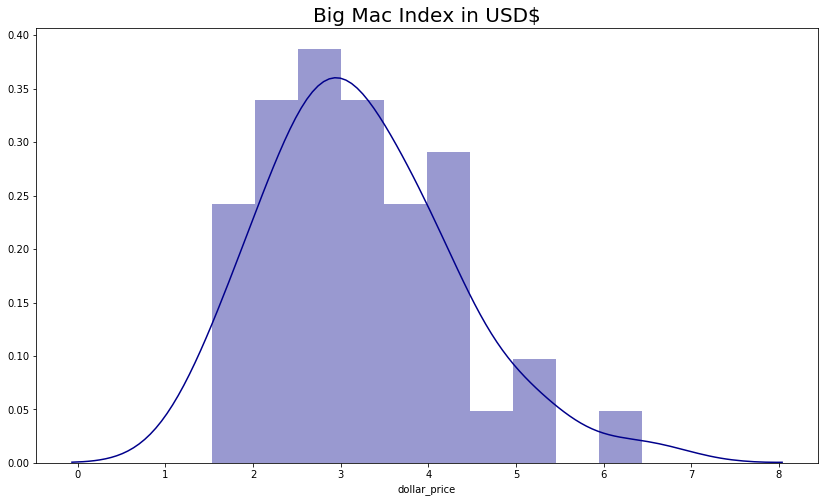

In [11]:
#Histogram of the Big Mac index
plt.figure(figsize = (14,8))
sns.distplot(df['dollar_price'], bins=10, color='darkblue')
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()

We have a series of prices per country distributed between 1.5 ans 6.5 USD. With a very wide distribution, mainly in europe.

### Correlation matrix

In [12]:
corr = df.corr()

In [13]:
corr

local_price  dollar_ex  dollar_price  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  AG.LND.CROP.ZS  AG.LND.TOTL.K2  AG.PRD.CROP.XD  AG.PRD.FOOD.XD  AG.PRD.LVSK.XD  AG.SRF.TOTL.K2  BM.KLT.DINV.CD.WD  BM.KLT.DINV.WD.GD.ZS  BX.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  EG.ELC.ACCS.ZS  EN.POP.DNST  EN.URB.LCTY  EN.URB.LCTY.UR.ZS  EP.PMP.SGAS.CD  ER.FSH.AQUA.MT  ER.FSH.CAPT.MT  ER.FSH.PROD.MT  ER.LND.PTLD.ZS  ER.PTD.TOTL.ZS  FI.RES.TOTL.CD  FI.RES.XGLD.CD  IC.BUS.DFRN.XQ  IC.BUS.DISC.XQ  IC.CRD.INFO.XQ  IC.CRD.PRVT.ZS  IC.CRD.PUBL.ZS  IC.ELC.TIME  IC.EXP.CSBC.CD  IC.EXP.CSDC.CD  IC.EXP.TMBC  IC.EXP.TMDC  IC.IMP.CSBC.CD  IC.IMP.CSDC.CD  IC.IMP.TMBC  IC.IMP.TMDC  IC.LGL.CRED.XQ  IC.LGL.DURS  IC.PRP.DURS  IC.PRP.PROC  IC.REG.COST.PC.FE.ZS  IC.REG.COST.PC.MA.ZS  IC.REG.COST.PC.ZS  IC.REG.DURS  IC.REG.DURS.FE  IC.REG.DURS.MA  IC.REG.PROC  IC.REG.PROC.FE  IC.REG.PROC.MA  IC.TAX.DURS  IC.TAX.LABR.CP.ZS  \
local_price                1.000000   0.995916     -0.155351       -0.094042       -0.027491       -0.080200          -0.132980        0.012605        0.413477       -0.086859        0.144114        0.211188        0.294169       -0.086075          -0.133252             -0.094233          -0.097002             -0.020966           0.039270           0.066964        0.047171    -0.041234    -0.016149          -0.093851       -0.176621        0.110664        0.157475        0.123659       -0.176955       -0.197075       -0.085677       -0.078998       -0.139840        0.075922       -0.041788       -0.297781        0.216453    -0.110003       -0.028997        0.174424     0.185435     0.255415        0.021731        0.047289     0.070758     0.158307        0.081280    -0.099141     0.124282    -0.054454              0.088895              0.088895           0.088895     0.096425        0.095204        0.097264     0.146711        0.141676        0.154317     0.129067           0.009676   
dollar_ex                  0.995916   1.000000     -0.167324       -0.088714       -0.027938       -0.073952          -0.132349        0.008417        0.419650       -0.080642        0.155296        0.223845        0.299032       -0.079809          -0.137797             -0.099547          -0.098150             -0.027104           0.032501           0.066984        0.041922    -0.042603    -0.011366          -0.105336       -0.188088        0.127339        0.175613        0.140976       -0.177885       -0.196110       -0.085959       -0.079335       -0.147941        0.093374       -0.051761       -0.313047        0.225183    -0.106020       -0.028752        0.183141     0.193202     0.270069        0.023662        0.050405     0.081412     0.175323        0.079830    -0.095858     0.119982    -0.056208              0.109740              0.109740           0.109740     0.101810        0.100587        0.102653     0.159332        0.154720        0.167747     0.122719          -0.002563   
dollar_price              -0.155351  -0.167324      1.000000       -0.074865       -0.150044       -0.163793           0.018708       -0.154206       -0.317063       -0.109161       -0.428126       -0.433964       -0.256377       -0.100410           0.294675              0.088278           0.272006             -0.042314           0.272818           0.267502        0.256216    -0.071706    -0.295699           0.008864        0.517775       -0.138769       -0.189793       -0.153224        0.048193        0.115367       -0.003252       -0.029356        0.485646       -0.258118       -0.074477        0.230870       -0.154654    -0.267676       -0.230838       -0.095097    -0.465059    -0.540373       -0.381992       -0.272107    -0.463289    -0.455762        0.144954    -0.192137    -0.230074    -0.451744             -0.333912             -0.333912          -0.333912    -0.331413       -0.332843       -0.329782    -0.370143       -0.377401       -0.374318    -0.139476          -0.190142   
AG.LND.AGRI.K2      

In [14]:
corr['dollar_price'].sort_values(ascending=False)

dollar_price              1.000000
PA.NUS.PPPC.RF            0.855375
NY.GNP.PCAP.CD            0.820118
NY.GDP.PCAP.CD            0.816031
NE.CON.PRVT.PC.KD         0.804915
NY.GNP.PCAP.KD            0.799420
NY.GDP.PCAP.KD            0.799373
NV.SRV.EMPL.KD            0.797783
NV.IND.EMPL.KD            0.735811
IT.NET.BBND.P2            0.722200
SP.DYN.LE00.MA.IN         0.716520
SP.DYN.TO65.MA.ZS         0.713917
SP.DYN.LE00.IN            0.669439
SL.EMP.1524.SP.FE.ZS      0.652405
SL.TLF.ACTI.1524.FE.ZS    0.650726
NY.GNP.PCAP.PP.KD         0.626129
NY.GNP.PCAP.PP.CD         0.624994
SL.TLF.ACTI.1524.ZS       0.618041
SL.EMP.1524.SP.ZS         0.616346
NY.GDP.PCAP.PP.KD         0.612496
NY.GDP.PCAP.PP.CD         0.610215
SL.GDP.PCAP.EM.KD         0.609445
SP.DYN.TO65.FE.ZS         0.593100
SP.DYN.LE00.FE.IN         0.591494
IT.NET.SECR.P6            0.585190
IT.NET.USER.ZS            0.569547
SP.POP.7074.MA.5Y         0.562549
SP.POP.80UP.MA.5Y         0.551415
SL.SRV.EMPL.MA.ZS   

In [15]:
corr_price = corr['dollar_price'].reset_index()
corr_price = corr_price.sort_values(by='dollar_price', ascending=False)

In [16]:
corr_price_sel = corr_price.loc[(corr_price['dollar_price'] > 0.7) | (corr_price['dollar_price'] < -0.7)].reset_index()
corr_price_sel = corr_price_sel.drop('level_0', axis=1)
corr_price_sel = corr_price_sel.drop(0, axis=0)
corr_price_sel.columns = ['Var', 'Corr']
corr_price_sel

Var      Corr
1      PA.NUS.PPPC.RF  0.855375
2      NY.GNP.PCAP.CD  0.820118
3      NY.GDP.PCAP.CD  0.816031
4   NE.CON.PRVT.PC.KD  0.804915
5      NY.GNP.PCAP.KD  0.799420
6      NY.GDP.PCAP.KD  0.799373
7      NV.SRV.EMPL.KD  0.797783
8      NV.IND.EMPL.KD  0.735811
9      IT.NET.BBND.P2  0.722200
10  SP.DYN.LE00.MA.IN  0.716520
11  SP.DYN.TO65.MA.ZS  0.713917

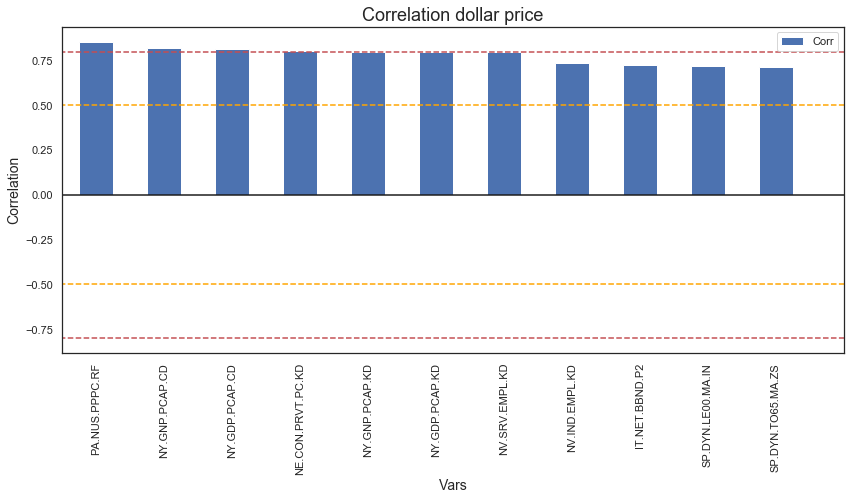

In [17]:
sns.set(style="white")
corr_price_sel.plot(kind='bar',figsize=(14,6))
plt.title("Correlation dollar price", fontsize=18, fontweight=400, ha='center')
plt.xlabel('Vars', fontsize=14, ha='center')
plt.ylabel('Correlation', fontsize=14, ha='center')
plt.xticks(np.arange(12), corr_price_sel['Var'], rotation=90)
plt.hlines(0.8,-1,12, colors='r',linestyles='dashed', label='0.8')
plt.hlines(-0.8,-1,12, colors='r',linestyles='dashed', label='-0.8')
plt.hlines(0.5,-1,12, colors='orange',linestyles='dashed', label='0.5')
plt.hlines(-0.5,-1,12, colors='orange',linestyles='dashed', label='-0.5')
plt.hlines(0,-1,12, colors='k',linestyles='solid')
plt.show()

**More Correlated Indicators:**

In [49]:
selected_indicators = data_indicators.loc[data_indicators['Indicator Code'].isin(corr_price_sel['Var'])]
selected_indicators.style.set_properties(subset=['Indicator Name'], **{'width': '500px'})

In [19]:
df_sel = df[corr_price_sel['Var']]

In [20]:
df_sel.head()

PA.NUS.PPPC.RF  NY.GNP.PCAP.CD  NY.GDP.PCAP.CD  NE.CON.PRVT.PC.KD  NY.GNP.PCAP.KD  NY.GDP.PCAP.KD  NV.SRV.EMPL.KD  NV.IND.EMPL.KD  IT.NET.BBND.P2  SP.DYN.LE00.MA.IN  SP.DYN.TO65.MA.ZS
0        0.526922         40550.0    38141.846759       12582.218149    41269.699329    41045.111117    39082.545594   123922.972283       13.998267             76.565           84.36459
1        0.635369         12220.0    12790.242473        7037.394587    10015.813850    10239.481348    17232.857675    24612.915367       16.473321             72.777           76.49273
2        1.056341         54190.0    50019.967768       31246.764755    54591.917649    55875.096423    96407.988929   137411.087392       30.653414             80.400           89.49928
3        0.568298          8930.0     8712.887044        6889.377261    10732.882207    10962.625494    21587.116329    24831.731827       12.888430             71.883           73.01576
4        0.939310         43940.0    42279.900823       29311.564622    49763.947488    50236.535070    83033.855296   132450.292655       36.887742             80.441           88.40681

In [21]:
dp = pd.Series(df['dollar_price'])
con = pd.Series(df['continent'])

df_sel['dollar_price'] = dp.values
df_sel['continent'] = con.values

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
df_sel.head()

PA.NUS.PPPC.RF  NY.GNP.PCAP.CD  NY.GDP.PCAP.CD  NE.CON.PRVT.PC.KD  NY.GNP.PCAP.KD  NY.GDP.PCAP.KD  NV.SRV.EMPL.KD  NV.IND.EMPL.KD  IT.NET.BBND.P2  SP.DYN.LE00.MA.IN  SP.DYN.TO65.MA.ZS  dollar_price continent
0        0.526922         40550.0    38141.846759       12582.218149    41269.699329    41045.111117    39082.545594   123922.972283       13.998267             76.565           84.36459      3.539245      Asia
1        0.635369         12220.0    12790.242473        7037.394587    10015.813850    10239.481348    17232.857675    24612.915367       16.473321             72.777           76.49273      2.389703   America
2        1.056341         54190.0    50019.967768       31246.764755    54591.917649    55875.096423    96407.988929   137411.087392       30.653414             80.400           89.49928      3.743655   Oceania
3        0.568298          8930.0     8712.887044        6889.377261    10732.882207    10962.625494    21587.116329    24831.731827       12.888430             71.883           73.01576      3.354204   America
4        0.939310         43940.0    42279.900823       29311.564622    49763.947488    50236.535070    83033.855296   132450.292655       36.887742             80.441           88.40681      4.144195   America

In [23]:
df_sel.describe().T

count          mean           std          min           25%           50%            75%            max
PA.NUS.PPPC.RF      42.0      0.624055      0.293552     0.260634      0.369748      0.525498       0.917034       1.246382
NY.GNP.PCAP.CD      42.0  24149.523810  22597.741842  1420.000000   6205.000000  12825.000000   41952.500000   82130.000000
NY.GDP.PCAP.CD      42.0  23555.628007  21633.970844  1368.454326   6035.301316  12814.913509   40411.652754   80037.503040
NE.CON.PRVT.PC.KD   42.0  13251.599993  11838.866292   911.133023   4146.427762   8124.974208   24321.096563   41566.025278
NY.GNP.PCAP.KD      42.0  24762.142143  23407.981588  1187.671019   6963.670801  14161.965253   41233.848195   93989.169660
NY.GDP.PCAP.KD      42.0  24842.311682  23091.718705  1119.039071   7036.759817  14447.700751   41912.508848   90402.602193
NV.SRV.EMPL.KD      42.0  43525.129394  36692.516389  3466.634555  13167.759264  27814.397424   76640.237135  129127.431630
NV.IND.EMPL.KD      42.0  61837.852160  60581.531473  2733.683546  24090.182519  33584.886018  100847.151365  298708.569067
IT.NET.BBND.P2      42.0     20.724368     13.531762     0.850298     10.260407     17.795510      32.417942      44.913618
SP.DYN.LE00.MA.IN   42.0     74.426429      5.439536    59.231000     71.656500     74.307500      79.375000      81.700000
SP.DYN.TO65.MA.ZS   42.0     78.373734     10.137803    47.350350     73.027070     79.815935      87.487780      89.985920
dollar_price        42.0      3.226538      1.063136     1.527024      2.441451      3.083627       3.870131       6.443299

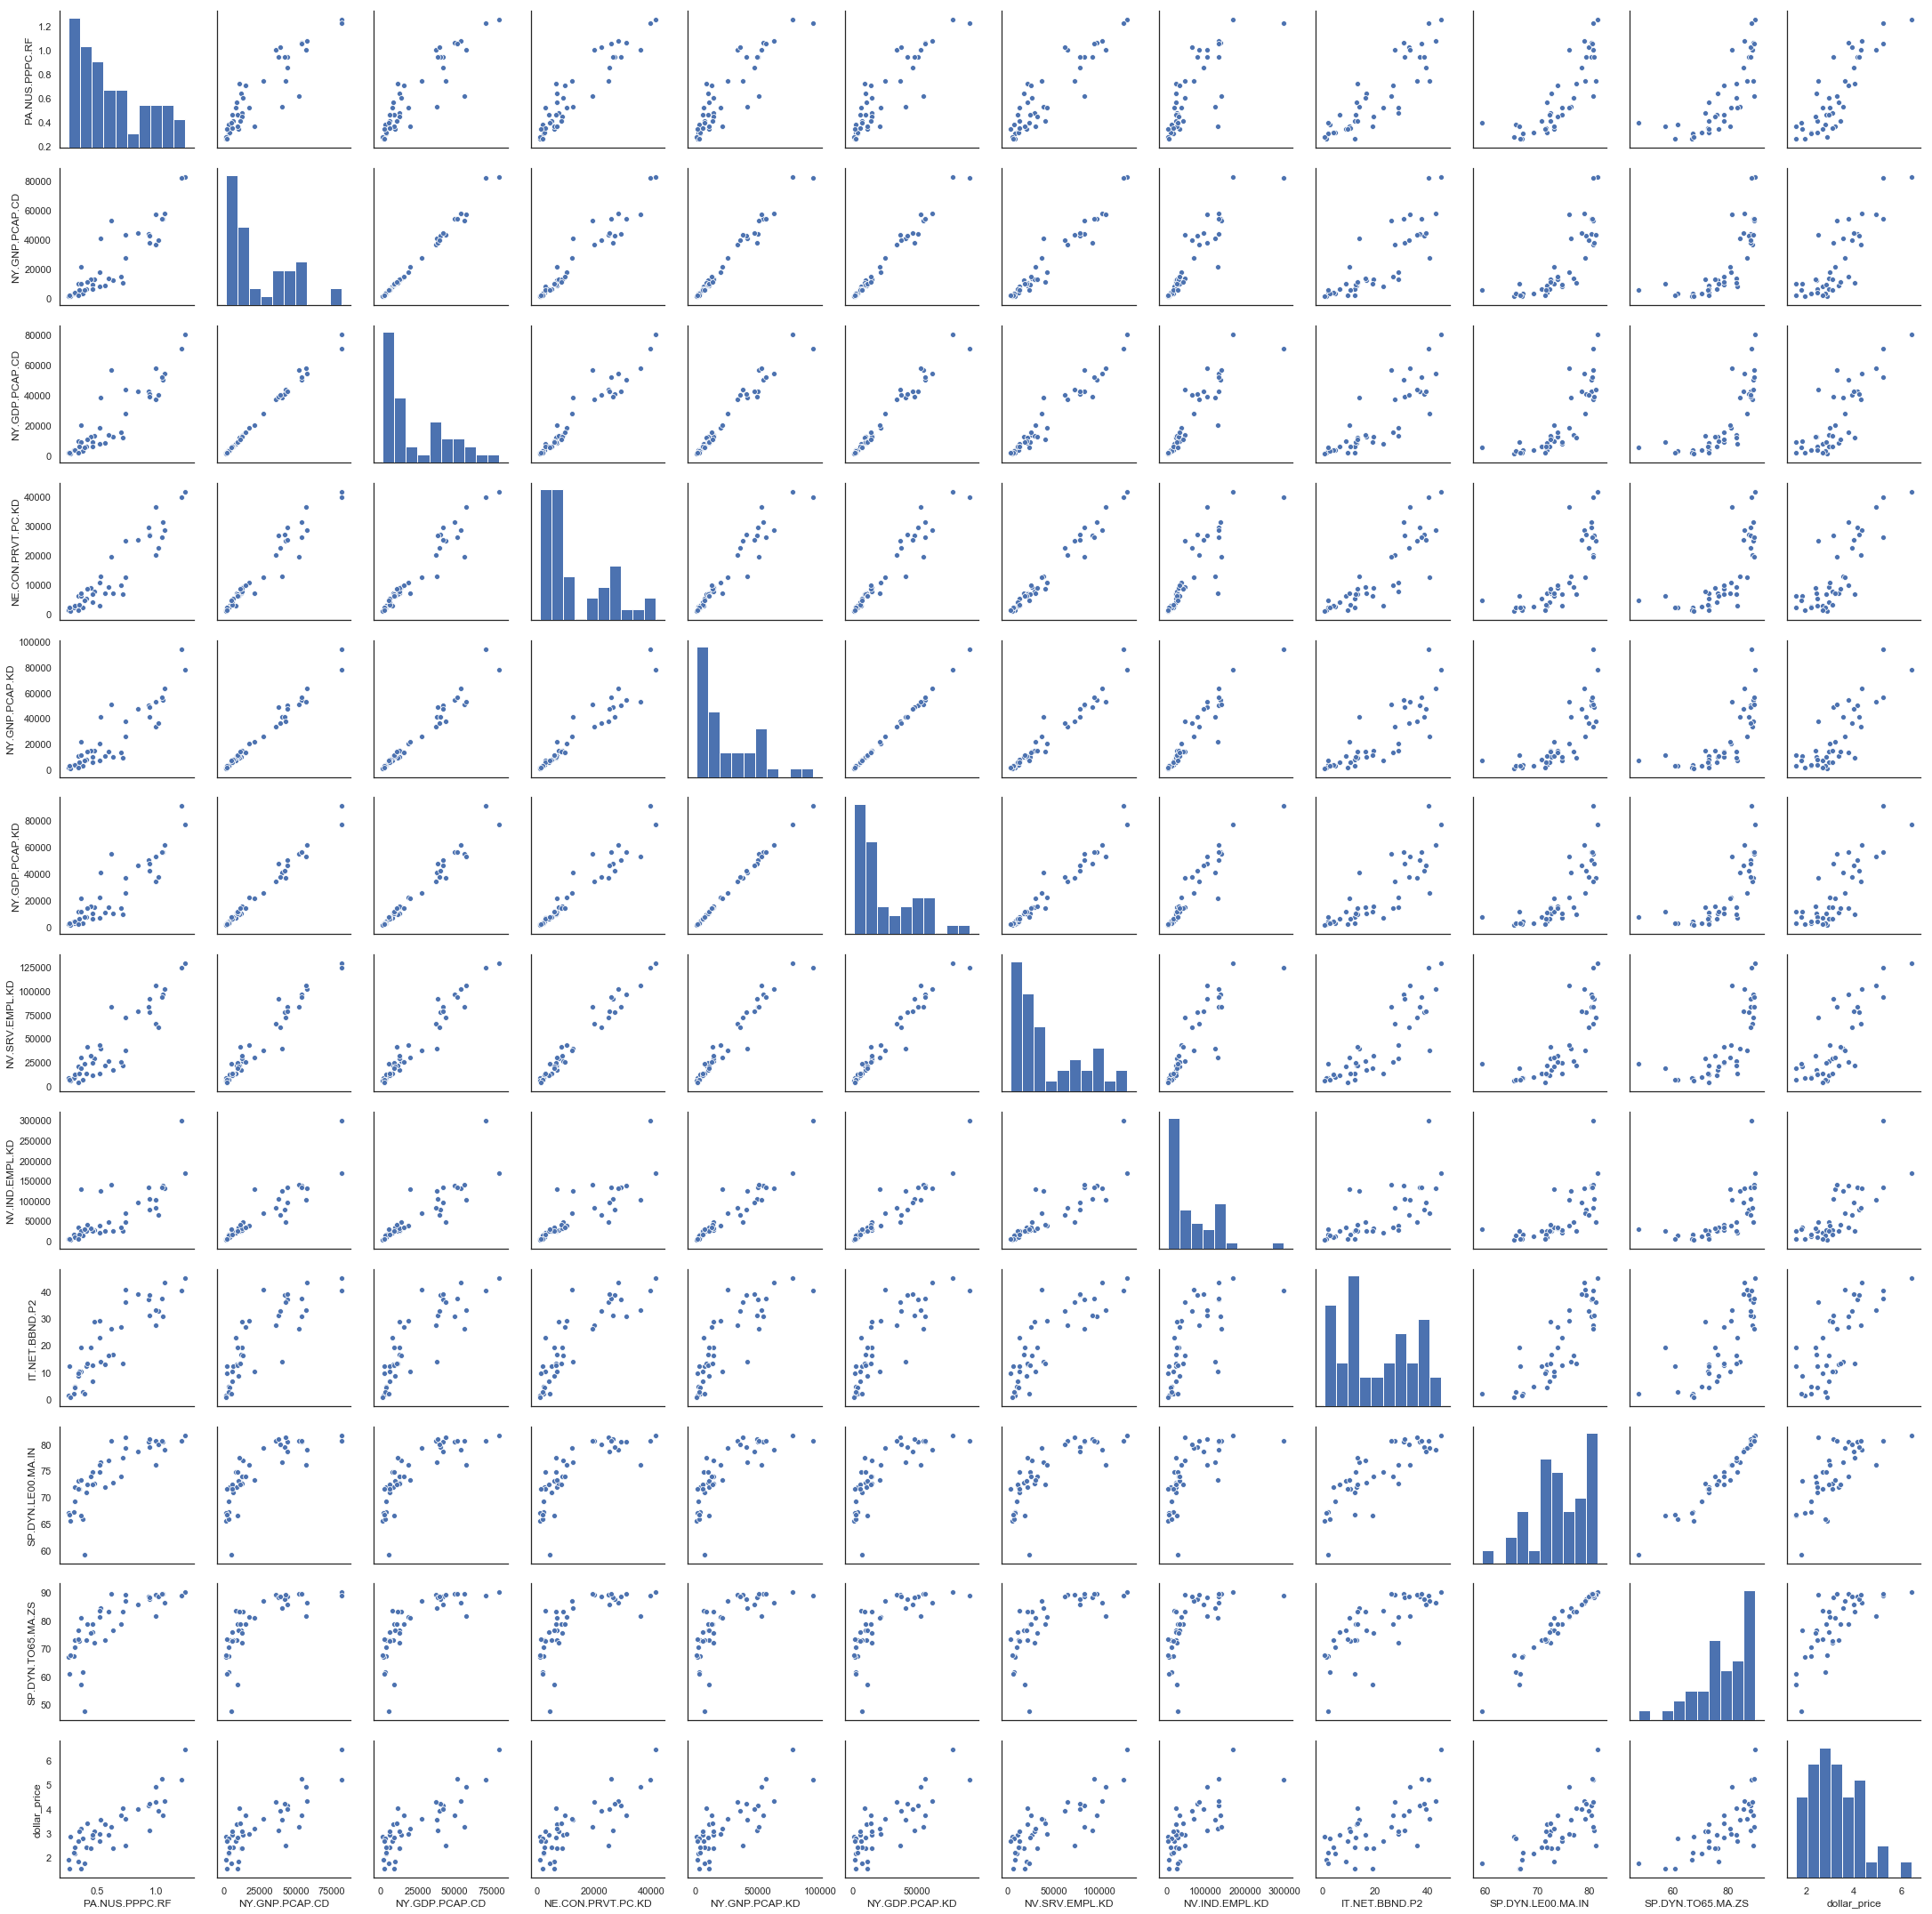

In [52]:
sns.pairplot(df_sel)
plt.show()

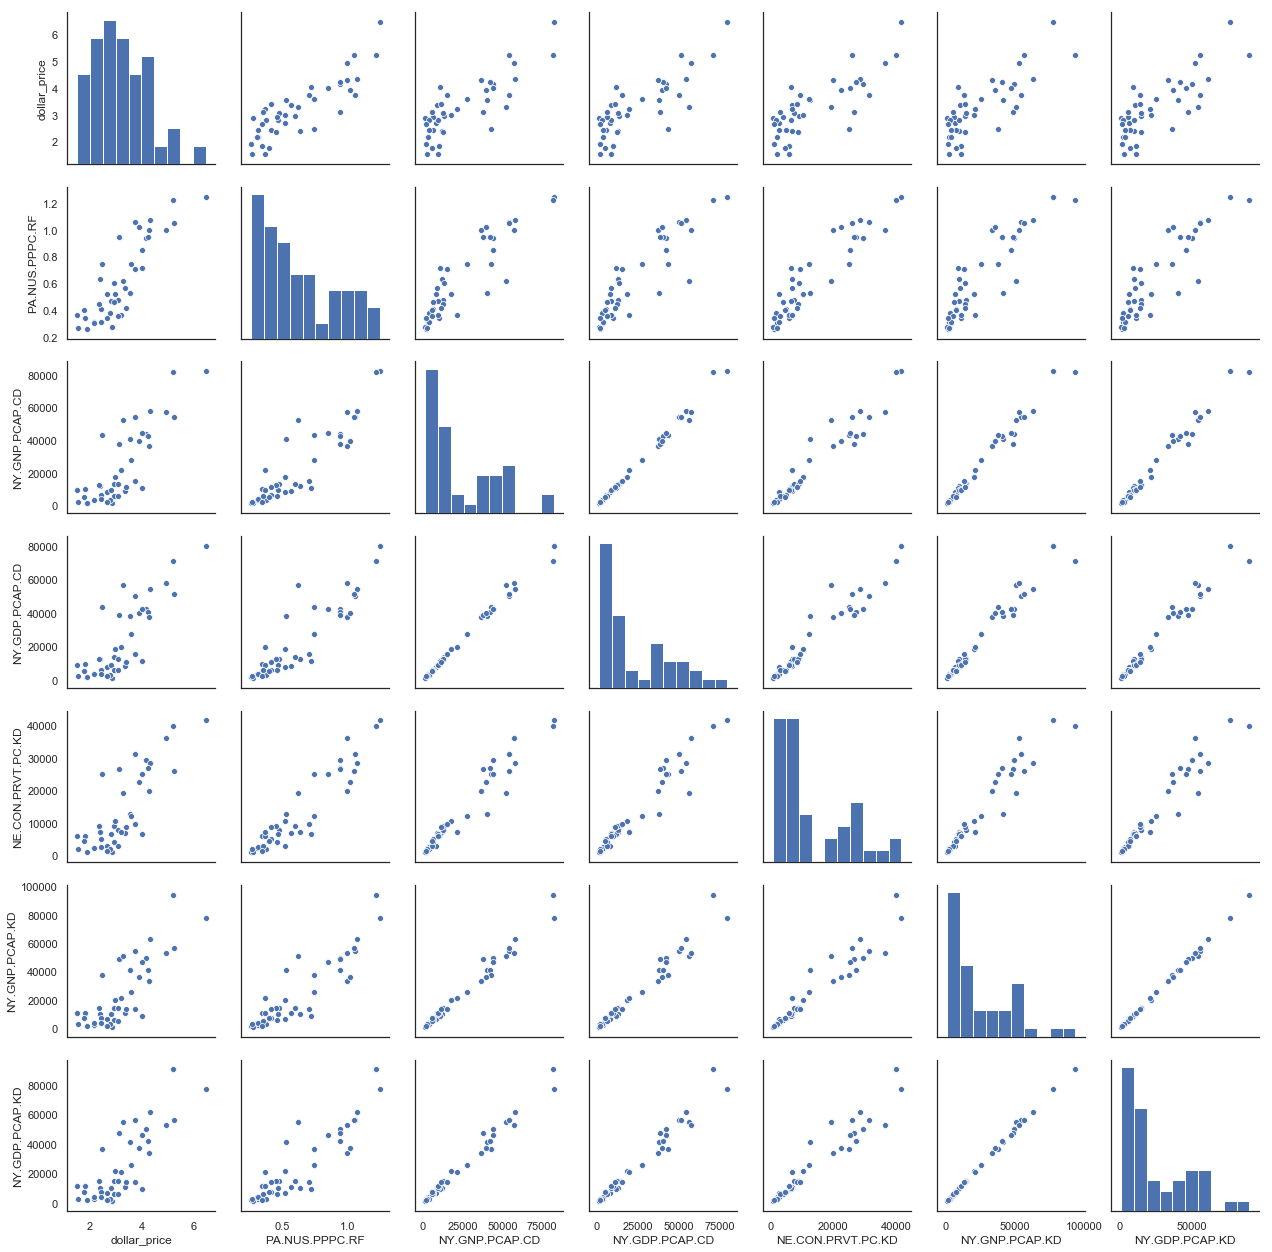

In [53]:
sns.pairplot(df_sel, vars=['dollar_price','PA.NUS.PPPC.RF', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NE.CON.PRVT.PC.KD', 'NY.GNP.PCAP.KD', 'NY.GDP.PCAP.KD'])
plt.show()

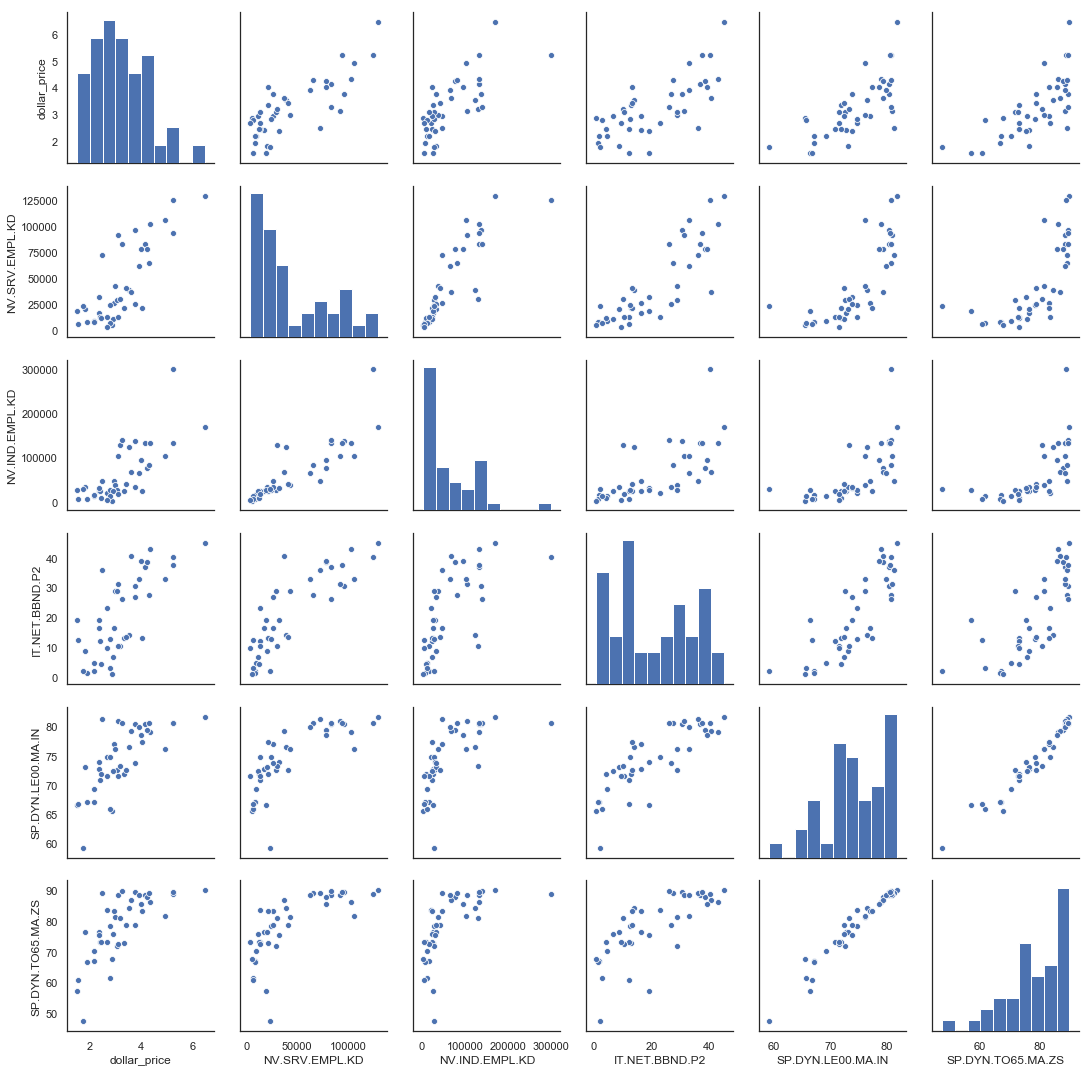

In [54]:
sns.pairplot(df_sel, vars=['dollar_price','NV.SRV.EMPL.KD', 'NV.IND.EMPL.KD', 'IT.NET.BBND.P2','SP.DYN.LE00.MA.IN', 'SP.DYN.TO65.MA.ZS' ])
plt.show()

### HYPOTHESIS

In [24]:
df2 = df.copy() #cortafuegos con los datos de df

In [25]:
mean_rest = df2['dollar_price'].loc[df2['continent'] != 'America'].mean()
mean_rest

3.18238239926401

In [26]:
prices_america = df2['dollar_price'].loc[df2['continent'] != 'America']

**Ho=** In America the Price of the Big Mac is equal than the rest of the continents mean 3.18 <br>
**H1=** is differnt

In [27]:
m = 3.18
alpha = 0.05
ttest = stats.ttest_1samp(prices_america, m)
print(f'T-test statistic={ttest[0]}, pvalue={ttest[1]}')
alpha = 0.05
if (ttest[1] < alpha):
    print(f'Reject null hypothesis, mean is different from {m}')
else:
    print('Accept null hypothesis')

T-test statistic=0.011873201748281402, pvalue=0.9906028619353493
Accept null hypothesis


### CONFIDENCE INTERVAL

The 95% confidence interval for the Big Mac Price in America is:

In [28]:
mean = prices_america.mean()
st = stats.sem(prices_america)
alpha = 0.95
df = prices_america.count()-1
t.interval(alpha, df, loc=mean, scale=st)

(2.773146926251343, 3.591617872276677)

### Regresion Analysis

**GDP vs Big Mac Price**

In [29]:
x_values = df2['NY.GDP.PCAP.CD'].values
y_values = df2['dollar_price'].values
GDP_BM = pd.DataFrame({'X': x_values, 'Y': y_values})

In [30]:
GDP_BM.head()

X         Y
0  38141.846759  3.539245
1  12790.242473  2.389703
2  50019.967768  3.743655
3   8712.887044  3.354204
4  42279.900823  4.144195

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GDP_BM['X'], GDP_BM['Y'])

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 4.010134372817819e-05
The intercept is: 2.281926103972826


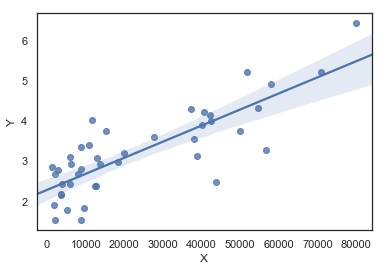

In [32]:
sns.regplot(x = 'X', y = 'Y', data=GDP_BM)
plt.show()

**GNI vs Big Mac Price**

In [33]:
x_values = df2['NY.GNP.PCAP.KD'].values
y_values = df2['dollar_price'].values
GNI_BM = pd.DataFrame({'X': x_values, 'Y': y_values})

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GNI_BM['X'], GNI_BM['Y'])

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 3.630776434434475e-05
The intercept is: 2.327480417845462


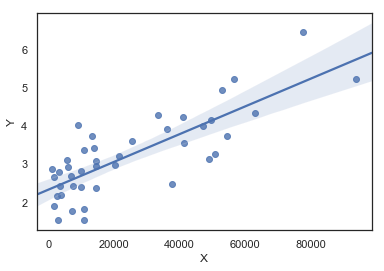

In [35]:
sns.regplot(x = 'X', y = 'Y', data=GNI_BM)
plt.show()

**GNI vs GDP**

In [55]:
x_values = df2['NY.GNP.PCAP.KD'].values
y_values = df2['NY.GDP.PCAP.KD'].values
GNI_GDP = pd.DataFrame({'X': x_values, 'Y': y_values})

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GNI_BM['X'], GNI_BM['Y'])

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 3.630776434434475e-05
The intercept is: 2.327480417845462


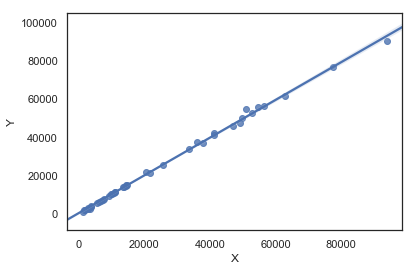

In [58]:
sns.regplot(x = 'X', y = 'Y', data=GNI_GDP)
plt.show()

Podemos ver que las variables GNI y GPD están muy positivamente correlacionadas linealmente. Por tanto podríamos quitar alguna de ellas.

### Regression model

Prediction of the Big Mac Price with the 10 indicators:

* Fixed broadband subscriptions (per 100 people)
* Households and NPISHs Final consumption expenditure per capita (constant 2010 US)
* Industry (including construction), value added per worker (constant 2010 US)
* Services, value added per worker (constant 2010 US)
* GDP per capita (current US)
* GDP per capita (constant 2010 US)
* GNI per capita, Atlas method (current US)
* GNI per capita (constant 2010 US)
* Price level ratio of PPP conversion factor (GDP) to market exchange rate
* Life expectancy at birth, male (years)
* Survival to age 65, male (% of cohort)

In [60]:
rgm1_df = df2[['dollar_price','IT.NET.BBND.P2','NE.CON.PRVT.PC.KD','NV.IND.EMPL.KD',
             'NV.SRV.EMPL.KD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'NY.GNP.PCAP.CD',
             'NY.GNP.PCAP.KD', 'PA.NUS.PPPC.RF', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TO65.MA.ZS']]

In [63]:
Y = rgm1_df.iloc[:,0:1]
Xm = rgm1_df.iloc[:,1:]
model = sm.OLS(Y,Xm) #OLS Multi Regresion Model
results = model.fit()
predictions = results.predict(Xm)

In [64]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           dollar_price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              139.5
Date:                Thu, 19 Sep 2019   Prob (F-statistic):                    3.25e-23
Time:                        19:56:27   Log-Likelihood:                         -28.543
No. Observations:                  42   AIC:                                      79.09
Df Residuals:                      31   BIC:                                      98.20
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Prediction of the Big Mac Price with the indeicators:<br>
* Fixed broadband subscriptions (per 100 people)
* Households and NPISHs Final consumption expenditures
* Industry (including construction), value added.
(the more correlated)

In [65]:
rgm2_df = df2[['dollar_price','IT.NET.BBND.P2','NE.CON.PRVT.PC.KD','NV.IND.EMPL.KD']]

In [66]:
Y = rgm2_df.iloc[:,0:1]
Xm = rgm2_df.iloc[:,1:]
model = sm.OLS(Y,Xm) #OLS Multi Regresion Model
results = model.fit()
predictions = results.predict(Xm)

In [67]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           dollar_price   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              79.05
Date:                Thu, 19 Sep 2019   Prob (F-statistic):                    1.25e-16
Time:                        19:57:02   Log-Likelihood:                         -69.805
No. Observations:                  42   AIC:                                      145.6
Df Residuals:                      39   BIC:                                      150.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### PCA

Tenemos 373 columnas inicales seleccionadas para el PCA, vamos a intentar reducir componentes con el PCA.

In [39]:
total_cols = df2.columns
selected_columns = [x for x in total_cols if x not in ['date', 'iso_a3', 'currency_code', 'name', 'local_price','dollar_ex', 'region', 'continent','dollar_price']]

In [40]:
# Separating out the features
x = df2.loc[:, selected_columns].values

# Separating out the target
y = df2.loc[:,['dollar_price']].values

# Standardizing the features
x = StandardScaler().fit_transform(x) #CAMBIO DE ESCALA A 0-1

In [41]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])


principalDf.head()

PC 1      PC 2      PC 3       PC 4      PC 5      PC 6      PC 7      PC 8      PC 9     PC 10
0 -0.842291 -3.623415  7.978637  24.022042  1.260745 -0.364846 -0.302197 -4.215099 -4.945324 -2.004087
1  2.824979 -5.956151 -9.402237  -1.891712  6.366778  5.804739  7.295152  1.634836 -7.154419  8.876131
2 -7.325392 -1.075117 -0.785650  -0.403103  4.790802 -3.196136  3.477554 -2.974319  3.036005 -0.553368
3  3.762054 -0.838194 -7.073409   0.435966  5.313309  5.296525  6.973506 -0.854590 -0.059698  0.344903
4 -9.405026 -0.038690 -0.832832  -2.070284  2.229549 -1.311854  0.907675 -3.378410  1.121933 -0.540387

In [42]:
pca.explained_variance_ratio_

array([0.22424438, 0.14911825, 0.0898302 , 0.07115982, 0.0552174 ,
       0.04873362, 0.03768038, 0.03071979, 0.03036882, 0.02459897])

In [43]:
sum(pca.explained_variance_ratio_)

0.7616716325146823

He añadido componentes hasta superar el 75% de explicación de la variable.
Nos quedan 10 componentes en lugar de 373,

In [74]:
for i in range(2,4):
    cols = ['PD' + str(j) for j in range(1,i)]
    print(cols)
    

['PD1']
['PD1', 'PD2']


In [111]:
dict_pca = {}
for i in range(2,31):
    cols = ['PCA' + str(j) for j in range(1,i+1)]
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = cols)
    dict_pca.update( {i : sum(pca.explained_variance_ratio_)} )

In [112]:
pca_df = pd.DataFrame.from_dict(dict_pca, orient='index').T
pca_df.columns = cols[1:]
pca_df

PCA2      PCA3      PCA4     PCA5      PCA6      PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14     PCA15    PCA16     PCA17     PCA18     PCA19     PCA20     PCA21     PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28     PCA29     PCA30
0  0.373363  0.463193  0.534353  0.58957  0.638304  0.675984  0.706704  0.737073  0.761672  0.782184  0.799308  0.816253  0.832616  0.847263  0.86096  0.872941  0.884429  0.895231  0.905587  0.914578  0.922948  0.930918  0.938619  0.945688  0.951983  0.957815  0.963102  0.968149  0.972684

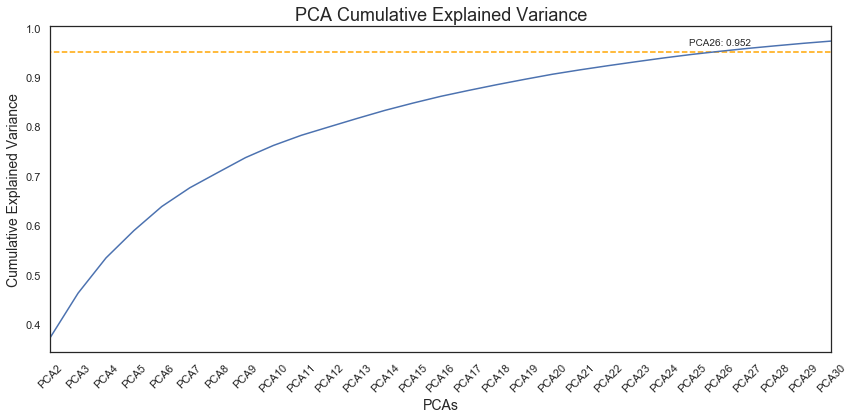

In [140]:
pca_df.T.plot(legend=None,figsize=(14,6))
plt.title("PCA Cumulative Explained Variance", fontsize=18, fontweight=400, ha='center')
plt.xlabel('PCAs', fontsize=14, ha='center')
plt.ylabel('Cumulative Explained Variance', fontsize=14, ha='center')
plt.hlines(0.95,-1,30, colors='orange',linestyles='dashed')
plt.xticks(np.arange(29), pca_df.columns, rotation=45)
plt.text(24,0.97,'PCA26: ' + str(round(pca_df['PCA26'].values[0],4)), ha="center", va="center",fontsize=10)
plt.show()

En este caso, cogeríamos 26 componentes en vez de usar las 382 columnas